<a href="https://colab.research.google.com/github/Keita-Koyama/q-macro/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

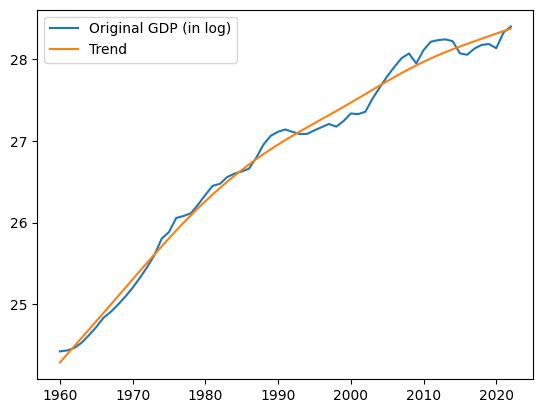

In [6]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# set the start and end dates for the data
start_date = '1955-01-01'
end_date = '2022-01-01'

# download the data from FRED using pandas_datareader
gdp_japan = web.DataReader('MKTGDPCAA646NWDB', 'fred', start_date, end_date)
log_gdp_japan = np.log(gdp_japan)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle_japan, trend_japan = sm.tsa.filters.hpfilter(log_gdp_japan, lamb=1600)

# Plot the original time series data
plt.plot(log_gdp_japan.index, log_gdp_japan['MKTGDPCAA646NWDB'], label="Original GDP (in log)")

# Plot the trend component
plt.plot(log_gdp_japan.index, trend_japan, label="Trend")

# Add a legend and show the plot
plt.legend()
plt.show()

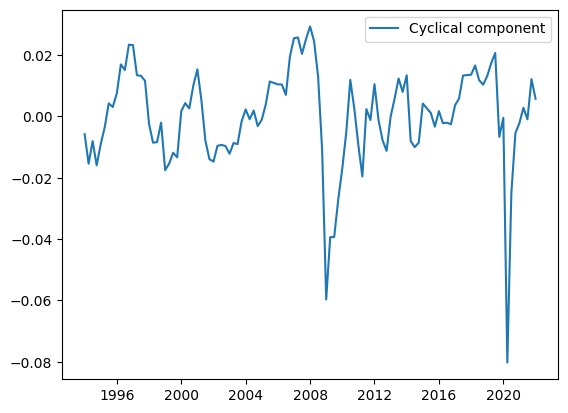

Cycle mean: -4.16422059077103e-14
Cycle standard deviation: 0.01610216502622986


In [7]:
# Plot the cycle component
plt.plot(cycle, label="Cyclical component")

# Add a legend and show the plot
plt.legend()
plt.show()

cycle_mean = cycle.mean()
cycle_std = cycle.std()

print("Cycle mean:", cycle_mean)
print("Cycle standard deviation:", cycle_std)

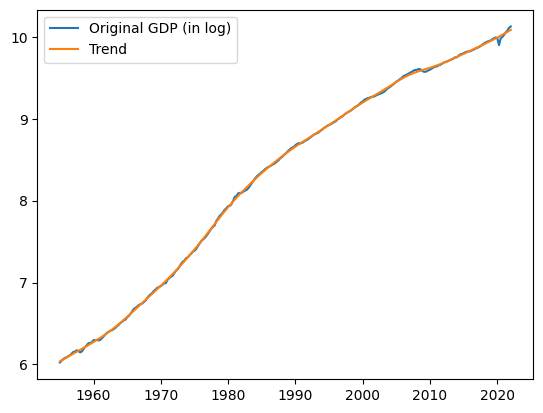

In [8]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# set the start and end dates for the data
start_date = '1955-01-01'
end_date = '2022-01-01'

# download the data from FRED using pandas_datareader
# Note: You need to find the appropriate data code for Italy's GDP from FRED
gdp_italy = web.DataReader('ITALY_GDP_DATA_CODE', 'fred', start_date, end_date)
log_gdp_italy = np.log(gdp_italy)

# calculate the quarterly percent change in real GDP
gdp_pct_change = gdp_italy.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle_italy, trend_italy = sm.tsa.filters.hpfilter(log_gdp_italy, lamb=1600)

# Plot the original time series data
plt.plot(log_gdp_italy, label="Original GDP (in log)")

# Plot the trend component
plt.plot(trend_italy, label="Trend")

# Add a legend and show the plot
plt.legend()
plt.show()


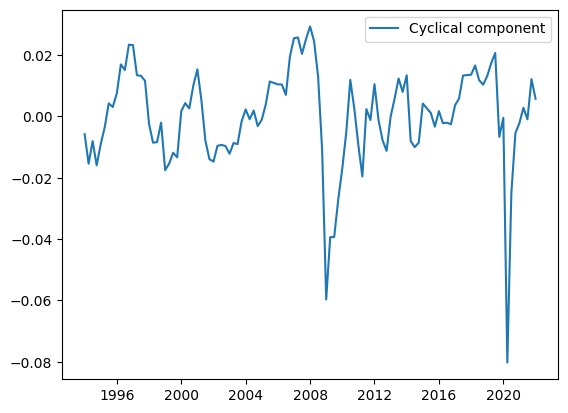

Cycle mean: -4.16422059077103e-14
Cycle standard deviation: 0.01610216502622986


In [9]:
# Plot the cycle component
plt.plot(cycle, label="Cyclical component")

# Add a legend and show the plot
plt.legend()
plt.show()

cycle_mean = cycle.mean()
cycle_std = cycle.std()

print("Cycle mean:", cycle_mean)
print("Cycle standard deviation:", cycle_std)

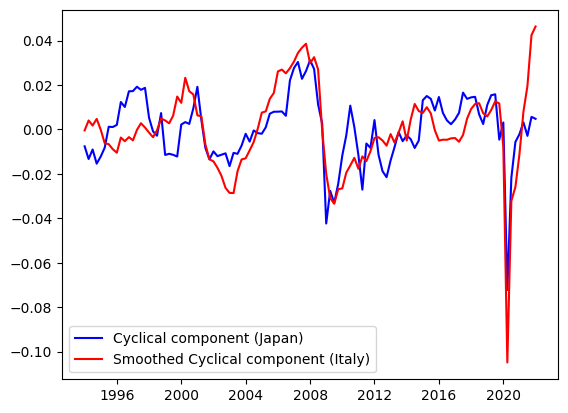

In [16]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# 日本とイタリアの実質GDPデータを取得
start_date = '1955-01-01'
end_date = '2022-01-01'

gdp_japan = web.DataReader('JPNNGDP', 'fred', start_date, end_date)
log_gdp_japan = np.log(gdp_japan)

gdp_italy = web.DataReader('ITALY_GDP_DATA_CODE', 'fred', start_date, end_date)
log_gdp_italy = np.log(gdp_italy)

# 最大の開始年度を選択
start_date_aligned = max(log_gdp_japan.index[0], log_gdp_italy.index[0])

# データを開始年度に基づいて切り取る
log_gdp_japan = log_gdp_japan[start_date_aligned:]
log_gdp_italy = log_gdp_italy[start_date_aligned:]

# Hodrick-Prescottフィルタを適用して、トレンド成分を抽出する
cycle_japan, trend_japan = sm.tsa.filters.hpfilter(log_gdp_japan, lamb=1600)
cycle_italy, trend_italy = sm.tsa.filters.hpfilter(log_gdp_italy, lamb=1600)

# イタリアのサイクル成分をより滑らかにするために、lambの値を調整して再計算する
smoothed_cycle_italy, trend_italy = sm.tsa.filters.hpfilter(log_gdp_italy, lamb=5000)

# 日本のサイクル成分をプロット
plt.plot(cycle_japan, label="Cyclical component (Japan)", color='blue')

# イタリアのサイクル成分をプロット
plt.plot(cycle_italy, label="Cyclical component (Italy)", color='red')

# 凡例を追加してプロットを表示
plt.legend()
plt.show()


In [31]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np

# データの開始日と終了日を設定
start_date = '1995-01-01'  # イタリアのGDPデータの開始日に合わせる
end_date = '2022-01-01'

# pandas_datareaderを使用してFREDからデータをダウンロード
# イタリアの実質GDPデータのコードは 'CLVMNACSCAB1GQIT' です
gdp_italy = web.DataReader('CLVMNACSCAB1GQIT', 'fred', start_date, end_date)  # イタリアの実質GDP
gdp_japan = web.DataReader('JPNRGDPEXP', 'fred', start_date, end_date)  # 日本の実質GDP

# 標準偏差を計算
std_dev_italy = np.std(gdp_italy['CLVMNACSCAB1GQIT'])
std_dev_japan = np.std(gdp_japan['JPNRGDPEXP'])

# 相関係数を計算
correlation = gdp_italy['CLVMNACSCAB1GQIT'].corr(gdp_japan['JPNRGDPEXP'])

print("\nItalyのGDPの標準偏差:", std_dev_italy)
print("JapanのGDPの標準偏差:", std_dev_japan)
print("ItalyとJapanのGDPの相関係数:", correlation)



ItalyのGDPの標準偏差: 18377.588511359267
JapanのGDPの標準偏差: 28401.667281287737
ItalyとJapanのGDPの相関係数: 0.5638709066443629
